In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

### ALGUNAS DEFINICIONES DE INTERÉS 

-Refugiados bajo el mandato de ACNUR: En resumen, un refugiado es una persona que ha cruzado las fronteras internacionales y ha buscado protección en otro país porque enfrenta amenazas graves en su país de origen.<br>

-Solicitantes de asilo: individuos que han buscado protección internacional y cuyas solicitudes de estatus de refugiado aún no han sido determinadas.<br>

-Personas desplazadas internas: son personas o grupos de personas que han sido obligadas u obligadas a huir o abandonar sus hogares, debido a  conflictos armados, situaciones de violencia generalizada, violaciones de los derechos humanos o desastres naturales, y que no han cruzado una frontera estatal reconocida internacionalmente<br>

-Otras personas que necesitan protección internacional: han sido desplazadas forzosamente a través de fronteras internacionales, que no han sido informadas bajo otras categorías (solicitantes de asilo, refugiados, personas en situaciones similares a las de los refugiados) pero que probablemente necesitan protección internacional <br>

-Otras personas de interés para ACNUR: no necesariamente encajan directamente en ninguno de estos grupos anteriores, pero a quienes el ACNUR ha extendido sus servicios de protección y/o asistencia, basándose en motivos humanitarios <br>

In [20]:
population = pd.read_csv(r'C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\population_final.csv')
population.head()

,Unnamed: 0,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,...,Others of concern,Total forced displacements,Continent_of_Asylum,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
0,0,2023,Philippines,PHL,Poland,POL,5,0,0,0,...,0,5,Europe,Eastern Europe,Asia,South-Eastern Asia,20.0,52.0,122.0,13.0
1,1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,...,0,6,Europe,Eastern Europe,Africa,Southern Africa,20.0,52.0,24.0,-29.0
2,2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,...,0,3386,Europe,Eastern Europe,Europe,Eastern Europe,20.0,52.0,100.0,60.0
3,3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,...,0,5,Europe,Eastern Europe,Africa,Eastern Africa,20.0,52.0,30.0,-2.0
4,4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,...,0,5,Europe,Eastern Europe,Europe,Southern Europe,20.0,52.0,21.0,44.0


In [5]:
population.isnull().sum()   

Year                                                0
Country of origin                                   0
Country of origin (ISO)                             0
Country of asylum                                   0
Country of asylum (ISO)                             0
Refugees under UNHCR's mandate                      0
Asylum-seekers                                      0
IDPs of concern to UNHCR                            0
Other people in need of international protection    0
Stateless persons                                   0
Host Community                                      0
Others of concern                                   0
dtype: int64

In [6]:
population['Host Community'].unique()

array(['0', '12002', '49305', '454831', '15765482', '2581900', '7576',
       '1700', '401356', '1400000', '14521', '3365', '827077', '81620',
       '174850', '13666', '83995', '876000', '3051', '947281', '1038257',
       '406161', '1224393', '96800', '2155', '617687', '81619', '5480',
       '1102358', '640', '11972', '85061', '371594', '15209720', '5433',
       '9346', '596148', '4200', '878451', '-', '3581', '500353', '8165',
       '391', '250000', '4605', '2428906', '4020', '6000', '5226',
       '110526', '741889', '1863', '1301', '84953', '5892', '494710',
       '68880', '9201', '26596', '154150', '472000', '44000', '2351313',
       '2304506'], dtype=object)

Vamos a ver cómo han evolucionado el número de personas forzadas a desplazarse a través de los años

In [7]:
# Queremos comprobar la columa other people in need of international protection que valores tiene para poder convertirla a númerica y poder sumarla a las demás columnas
population['Other people in need of international protection'].unique() 

array(['-', '10878', '23628', '17000', '14000', '51156', '146559', '311',
       '980470', '214771', '15428', '310148', '436060', '2452890',
       '18900', '114805', '495481', '19635', '53027', '146696', '1004',
       '969817', '165174', '13531', '264040', '436845', '2453862',
       '16598', '14178', '23023', '113722', '495304', '128000', '1910',
       '791442', '60', '8403', '14995', '5', '25', '175992', '92',
       '500271', '1842390', '21766', '116000', '503882', '234', '1469',
       '25800', '164622', '11805', '67', '63179', '81847', '118937',
       '2879', '515039', '19', '171659', '9557', '163754', '39', '454547',
       '1729537', '22401', '114050', '401777', '23307', '4663', '14063',
       '14', '21', '16691', '38', '11', '16602', '16190', '115768',
       '3588', '377864', '7664', '14362', '5472', '123507', '52',
       '452712', '1771237', '20828', '33816', '374045', '173343', '22000',
       '121', '52982', '42104', '94400', '803', '428214', '127152',
       '39771',

In [8]:
population['Other people in need of international protection'].isnull().mean() 

0.0

In [9]:
#reemplazar los valores '-' por np.nan en la columna 'Other people in need of international protection'
population['Other people in need of international protection'] = population['Other people in need of international protection'].replace('-', 0).astype(int)
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
0,2023,Philippines,PHL,Poland,POL,5,0,0,0,0,0,0
1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,0,0,0
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,0,0
3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,0,0,0
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,0,0,-,0
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,0,0,-,0
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,0,0,-,0
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,0,0,-,0


In [10]:
# Queremos calcular el porcentaje  de 0s en other of concern
population['Others of concern'].value_counts(normalize=True) * 100

# Vemos que el 98% de los valores son 0s, pero la dejamos porque es una columna importante para el estudio

0         98.099277
5          0.290399
6          0.064445
7          0.046146
10         0.040576
            ...    
497        0.000796
129445     0.000796
1747       0.000796
2941       0.000796
600        0.000796
Name: Others of concern, Length: 930, dtype: float64

In [ ]:
# Aunque en las columnas de 'Other people in need of international protection' y 'Others of concern' hay un alto porcentaje de 0s, lo dejamos porque son columnas que nos interesan en el estudio

In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125689 entries, 0 to 125688
Data columns (total 12 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   Year                                              125689 non-null  int64 
 1   Country of origin                                 125689 non-null  object
 2   Country of origin (ISO)                           125689 non-null  object
 3   Country of asylum                                 125689 non-null  object
 4   Country of asylum (ISO)                           125689 non-null  object
 5   Refugees under UNHCR's mandate                    125689 non-null  int64 
 6   Asylum-seekers                                    125689 non-null  int64 
 7   IDPs of concern to UNHCR                          125689 non-null  int64 
 8   Other people in need of international protection  125689 non-null  int32 
 9   Stateless perso

In [12]:
# Vamos a eliminar la columna Host community al no aportar información relevante
population.drop(['Host Community'], axis=1, inplace=True)

In [13]:
# hacer una nueva columna que sea la suma de los diferentes tipos tipos de refugiados
population['Total forced displacements'] = population['Refugees under UNHCR\'s mandate'] + population['Asylum-seekers'] + population['IDPs of concern to UNHCR']+population['Others of concern']+population['Other people in need of international protection']

# Vamos ahora a complementar nuestro dataset añadiéndole a cada país el continente y sub-región tanto de origen como de asilo haciendo un merge entre los dos datasets

In [14]:
# Cargamos el dataset con los datos de los países y continentes
continent = pd.read_csv('Data\countryContinent.csv')
continent = continent[['code_3', 'continent', 'sub_region']]

In [15]:
continent
continent.to_csv('Data/continent_clean.csv')

In [16]:
# añadir nueva columna con el continente y subregion a population
#primero creo un diccionario con los valores de code_3 como keys y continent y sub_region como values
continent_dict = dict(zip(continent.code_3, continent.continent))


In [17]:
continent_dict


{'AFG': 'Asia',
 'ALA': 'Europe',
 'ALB': 'Europe',
 'DZA': 'Africa',
 'ASM': 'Oceania',
 'AND': 'Europe',
 'AGO': 'Africa',
 'AIA': 'Americas',
 'ATA': nan,
 'ATG': 'Americas',
 'ARG': 'Americas',
 'ARM': 'Asia',
 'ABW': 'Americas',
 'AUS': 'Oceania',
 'AUT': 'Europe',
 'AZE': 'Asia',
 'BHS': 'Americas',
 'BHR': 'Asia',
 'BGD': 'Asia',
 'BRB': 'Americas',
 'BLR': 'Europe',
 'BEL': 'Europe',
 'BLZ': 'Americas',
 'BEN': 'Africa',
 'BMU': 'Americas',
 'BTN': 'Asia',
 'BOL': 'Americas',
 'BES': 'Americas',
 'BIH': 'Europe',
 'BWA': 'Africa',
 'BVT': nan,
 'BRA': 'Americas',
 'IOT': nan,
 'BRN': 'Asia',
 'BGR': 'Europe',
 'BFA': 'Africa',
 'BDI': 'Africa',
 'KHM': 'Asia',
 'CMR': 'Africa',
 'CAN': 'Americas',
 'CPV': 'Africa',
 'CYM': 'Americas',
 'CAF': 'Africa',
 'TCD': 'Africa',
 'CHL': 'Americas',
 'CHN': 'Asia',
 'CXR': nan,
 'CCK': nan,
 'COL': 'Americas',
 'COM': 'Africa',
 'COG': 'Africa',
 'COD': 'Africa',
 'COK': 'Oceania',
 'CRI': 'Americas',
 'CIV': 'Africa',
 'HRV': 'Europe',


In [18]:
subregion_dict = dict(zip(continent.code_3, continent.sub_region))
population['Sub_Region_of_Asylum'] = population['Country of asylum (ISO)'].map(subregion_dict)
population['Continent_of_origin']=population['Country of origin (ISO)'].map(continent_dict)
population['Sub_Region_of_Origin'] =  population['Country of origin (ISO)'].map(subregion_dict)

In [19]:
#ahora creo una nueva columna en population que se llame continent y que tenga los valores de continent_dict
population['Continent_of_Asylum'] = population['Country of asylum (ISO)'].map(continent_dict)

In [20]:
#Comprobar los paises que tienen valores nulos en continent os asylum 
population[population['Continent_of_Asylum'].isnull()]['Country of asylum (ISO)'].unique()

#UNK corresponde a Unknown por lo tanto, no hay ningún país sin continente asignado, así que perfecto. 

array(['UNK'], dtype=object)

In [21]:
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Others of concern,Total forced displacements,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Continent_of_Asylum
0,2023,Philippines,PHL,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Asia,South-Eastern Asia,Europe
1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,0,0,6,Eastern Europe,Africa,Southern Africa,Europe
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,0,3386,Eastern Europe,Europe,Eastern Europe,Europe
3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Africa,Eastern Africa,Europe
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Europe,Southern Europe,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,0,0,0,10000,Western Europe,NaN,NaN,Europe
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,0,0,0,2000,Northern Africa,NaN,NaN,Africa
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,0,0,0,2700,Western Asia,NaN,NaN,Asia
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,0,0,0,350000,Northern America,NaN,NaN,Americas


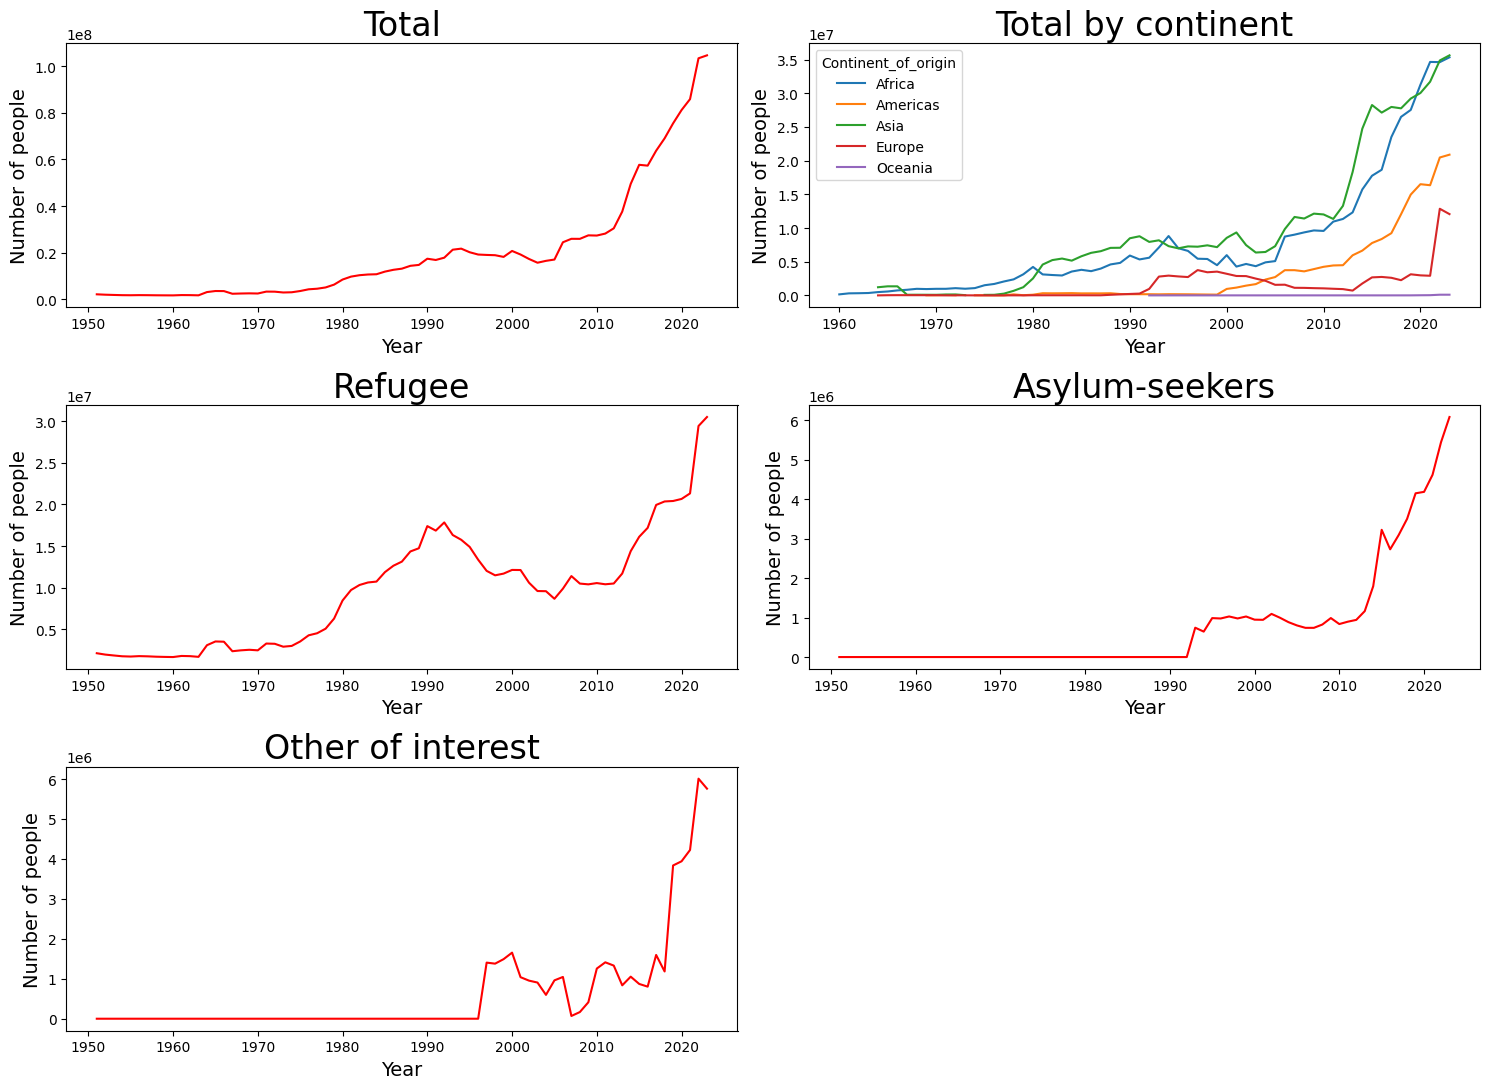

In [22]:

#Evoluicon de los datos de refugiados por año (totales, por continente y por tipo de desplazamiento forzado)
refugee = population.groupby(['Year'])['Refugees under UNHCR\'s mandate'].sum()
asylum_seek = population.groupby(['Year'])['Asylum-seekers'].sum()
others = population.groupby(['Year'])['Others of concern'].sum()
total = population.groupby(['Year'])['Total forced displacements'].sum()
continent = population.groupby(['Year', 'Continent_of_origin'])['Total forced displacements'].sum().unstack()

fig = plt.figure(figsize=(15, 11))

ax1 = fig.add_subplot(321)
ax1 = total.plot(kind='line', color='red')  # Corrected from 'others' to 'total'
ax1.set_title("Total", fontsize=24)
ax1.set_ylabel('Number of people', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax2 = fig.add_subplot(322)
ax2 = continent.plot(kind='line', ax=ax2)  # Added ax=ax5
ax2.set_title("Total by continent", fontsize=24)
ax2.set_ylabel('Number of people', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)

ax3 = fig.add_subplot(323)
ax3 = refugee.plot(kind='line', color='red')
ax3.set_title("Refugee", fontsize=24)
ax3.set_ylabel('Number of people', fontsize=14)
ax3.set_xlabel('Year', fontsize=14)

ax4 = fig.add_subplot(324)
ax4 = asylum_seek.plot(kind='line', color='red')
ax4.set_title("Asylum-seekers", fontsize=24)
ax4.set_ylabel('Number of people', fontsize=14)
ax4.set_xlabel('Year', fontsize=14)

ax5 = fig.add_subplot(325)
ax5 = others.plot(kind='line', color='red')
ax5.set_title("Other of interest", fontsize=24)
ax5.set_ylabel('Number of people', fontsize=14)
ax5.set_xlabel('Year', fontsize=14)




plt.tight_layout()
plt.show()


In [24]:
import plotly.express as px
import pandas as pd
plot_px = population[population['Year']>1979].groupby(['Year','Country of origin','Origin_longitude','Origin_latitude'])['Total forced displacements'].sum().reset_index().sort_values('Year', ascending=True)
plot_px['Total forced displacements']=(plot_px['Total forced displacements']/1000000).round(2)
# Crear el mapa interactivo con Plotly Express
fig = px.scatter_mapbox(plot_px, 
                        lat='Origin_latitude', 
                        lon='Origin_longitude', 
                        size='Total forced displacements', 
                        animation_frame='Year',  # Esto permite la animación a lo largo de los años
                        animation_group='Country of origin',
                        color='Total forced displacements',
                        range_color=[plot_px['Total forced displacements'].min(), plot_px['Total forced displacements'].max()],
                        zoom=1,
                        mapbox_style='open-street-map',  # Cambiar el estilo del mapa
                        title='Forced Displacements Over Time',
                        template='plotly_dark',
                        size_max=20,
                        labels={'Country of origin': 'Country'},
                        hover_name='Country of origin'  # Esta línea especifica la columna para las etiquetas al pasar el ratón
                       )

# Ajustar el tamaño del mapa y otros parámetros
fig.update_layout(mapbox=dict(center=dict(lat=0, lon=0)),  # Centrar el mapa en latitud 0, longitud 0
                  mapbox_style='open-street-map',  # Cambiar el estilo del mapa
                  margin=dict(r=0, l=0, t=0, b=0),  # Reducir los márgenes
                  coloraxis_colorbar=dict(yanchor='top', y=1, x=0.01, xanchor='left'),  # Mover la barra de colores a la izquierda
                  coloraxis_colorbar_len=0.5,
                  coloraxis_colorbar_ticktext=['1951', '2023'],
                  coloraxis_colorbar_tickvals=[plot_px['Total forced displacements'].min(), plot_px['Total forced displacements'].max()]  # Valores de las marcas de la barra de colores
                  )                                         

# Mostrar el gráfico
fig.show()

In [23]:
# 1994 genocidio de Ruanda y 1998 guerra civil en Congo
# 2003 guerra de Irak 
# 2011 guerra de Siria
# 2014 guerra de Yemen
# 2022 guerra de Ucrania 

In [24]:
# Poner a continuacion la grafica de plotly scatter de refugiados por continente y año y comentar los diferentes conflictos que han ocurrido en los diferentes continentes. 

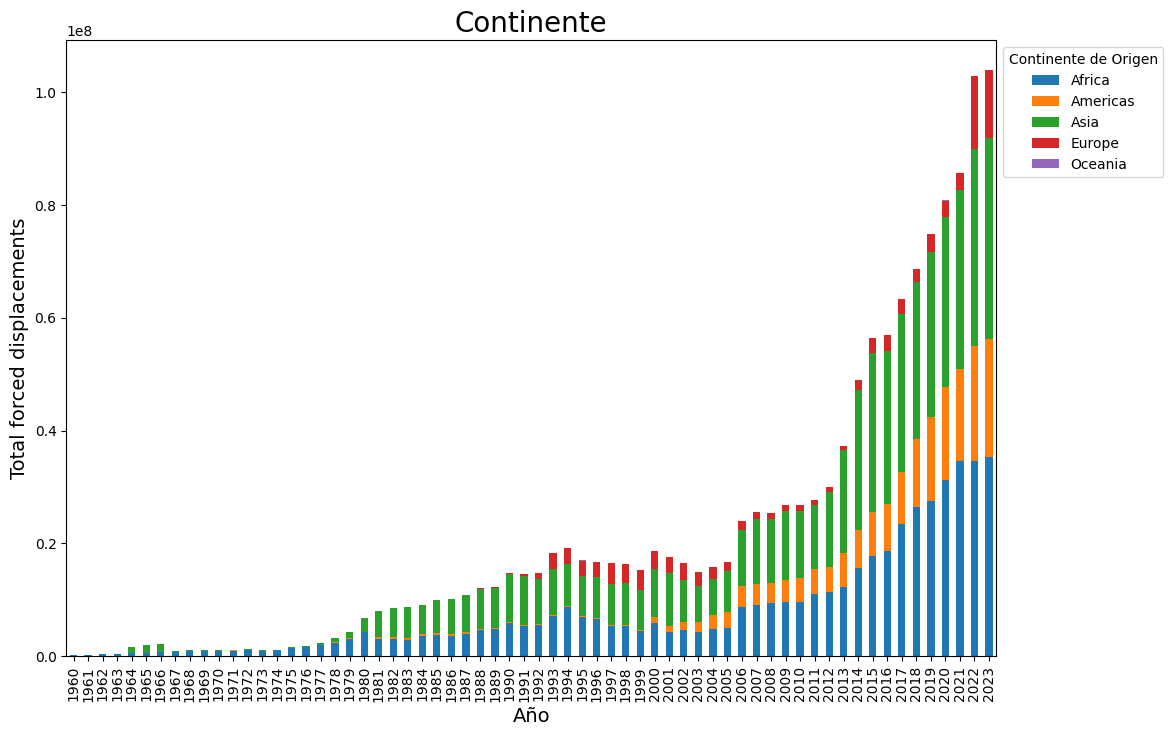

In [25]:

df_grouped = population.groupby(['Continent_of_origin', 'Year'])['Total forced displacements'].sum().reset_index()

#Gráfico de barras apiladas
ax = df_grouped.pivot(index='Year', columns='Continent_of_origin', values='Total forced displacements').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total forced displacements', fontsize = 14)
plt.title('Continente', fontsize = 20)
plt.legend(title='Continente de Origen', bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()

In [26]:
population_filtered = population[population['Year'] >= 2000]
asylum_grouped = population_filtered.groupby(['Continent_of_Asylum', 'Year'])['Total forced displacements'].sum().reset_index()
fig = px.bar(asylum_grouped, x='Year', y='Total forced displacements', color='Continent_of_Asylum', labels={'Total forced displacements': 'Total forced displacements'},title='Conitnent of Asylum')  
fig.show()

In [27]:
origin_grouped = population_filtered.groupby(['Continent_of_origin', 'Year'])['Total forced displacements'].sum().reset_index()
fig = px.bar(origin_grouped, x='Year', y='Total forced displacements', color='Continent_of_origin', labels={'Total forced displacements': 'Total forced displacements'},title='Conitnent of origin')
            
fig.show()

In [28]:
import geopandas as gpd
from branca.colormap import LinearColormap
import folium
import plotly.express as px 

In [29]:
#Importamos un geojson con los paises del mundo compatible con los paises de nuestro dataser (version ISO_3). En este apartado haremos algunas modificaciones y el merge de este dataset con el 
#geojson para poder representar en el mapa algunos datos de nuestro dataset 

mapa_origin = gpd.read_file(r"C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\Data\countries (1).geojson")
mapa_origin.rename(columns={'ISO_A3': 'Country of origin (ISO)', 'ADMIN':'Country'}, inplace=True) #renombrmaos columnas para poder mergear con nuestro dataset
mapa_origin
pop1 = population[population['Year'] == 2022][['Country of origin (ISO)', 'Total forced displacements','Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'IDPs of concern to UNHCR', ]].groupby('Country of origin (ISO)').sum().reset_index()
pop1['Total forced displacements']= pop1['Total forced displacements']/1000000
pop1['Refugees under UNHCR\'s mandate']= pop1['Refugees under UNHCR\'s mandate']/1000000
pop1['Asylum-seekers']= pop1['Asylum-seekers']/1000000
pop1['IDPs of concern to UNHCR']= pop1['IDPs of concern to UNHCR']/1000000
#creamos un nuevo dataset solo con las columnas que nos interesan y agrupamos por país de origen para poder hacer el merge con el geojson
mapa_origin = pd.merge(mapa_origin, pop1, on='Country of origin (ISO)', how='inner')

In [30]:
pop1

,Country of origin (ISO),Total forced displacements,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR
0,ABW,0.000007,0.000000,0.000007,0.000000
1,AFG,9.300875,5.661717,0.294493,3.254002
2,AGO,0.041859,0.012021,0.016523,0.000000
3,AIA,0.000010,0.000005,0.000005,0.000000
4,ALB,0.055271,0.020865,0.034406,0.000000
...,...,...,...,...,...
200,XXA,0.078748,0.054102,0.005803,0.000000
201,YEM,4.596721,0.040147,0.033524,4.523022
202,ZAF,0.004264,0.000784,0.003474,0.000000
203,ZMB,0.000772,0.000296,0.000471,0.000000


In [33]:
mapa_origin

,Country,Country of origin (ISO),geometry,Total forced displacements,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",0.000007,0.000000,0.000007,0.000000
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",9.300875,5.661717,0.294493,3.254002
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",0.041859,0.012021,0.016523,0.000000
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",0.000010,0.000005,0.000005,0.000000
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",0.055271,0.020865,0.034406,0.000000
...,...,...,...,...,...,...,...
195,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",0.000403,0.000008,0.000395,0.000000
196,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",4.596721,0.040147,0.033524,4.523022
197,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",0.004264,0.000784,0.003474,0.000000
198,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",0.000772,0.000296,0.000471,0.000000


In [34]:
# mapa de flujo entre subregiones de origen y subregiones de asilo 
#mapa de conexiones de los países que mas refugiados reciben y los países que mas refugiados envían


In [36]:
#Mapa de países de asilo 
mapa_asylum = gpd.read_file(r"C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\Data\countries (1).geojson") #leemos el geojsom
mapa_asylum.rename(columns={'ISO_A3': 'Country of asylum (ISO)', 'ADMIN':'Country'}, inplace=True) #renombramos la columna ISO_A3 a Country of asylum (ISO) para poder hacer el merge con population
#hacemos un df de asilo con los datos de pais de asilo ISO, total forced displacements, refugees under UNHCR's mandate, asylum-seekers, IDPs of concern to UNHCR

#mergeamos el mapa con el df de asilo

pop2 = population[population['Year'] == 2022][['Country of asylum (ISO)', 'Total forced displacements','Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'IDPs of concern to UNHCR', ]].groupby('Country of asylum (ISO)').sum().reset_index()
pop2['Total forced displacements']= pop2['Total forced displacements']/1000000
#creamos un nuevo dataset solo con las columnas que nos interesan y agrupamos por país de origen para poder hacer el merge con el geojson
mapa_asylum = pd.merge(mapa_asylum, pop2, on='Country of asylum (ISO)', how='inner')

In [38]:
origin_filtered = population[population['Year'] == 2020]
og = origin_filtered[['Country of origin (ISO)', 'Total forced displacements','Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'IDPs of concern to UNHCR']].groupby('Country of origin (ISO)').sum().reset_index()
mapa2020 = pd.merge(mapa_origin, og, on='Country of origin (ISO)', how='inner')

In [39]:
origin_filtered = population[population['Year'] == 2020]
og = origin_filtered.groupby('Country of origin (ISO)')['Total forced displacements'].sum().reset_index()
mapa2022 = pd.merge(mapa_origin, og, on='Country of origin (ISO)', how='inner', suffixes=('_mapa', '_og'))


In [40]:
mapa2022

,Country,Country of origin (ISO),geometry,Total forced displacements_mapa,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Total forced displacements_og
0,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",9.300875,5.661717,0.294493,3.254002,5807434
1,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",0.041859,0.012021,0.016523,0.000000,39639
2,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",0.000010,0.000005,0.000005,0.000000,5
3,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",0.055271,0.020865,0.034406,0.000000,33151
4,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",0.000010,0.000005,0.000005,0.000000,5
...,...,...,...,...,...,...,...,...
190,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",0.000403,0.000008,0.000395,0.000000,133
191,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",4.596721,0.040147,0.033524,4.523022,4069343
192,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",0.004264,0.000784,0.003474,0.000000,3710
193,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",0.000772,0.000296,0.000471,0.000000,732


In [41]:

#Funcion para representar un mapa con plotly. Esta funcion nos pedira un df, una columna objetivo (datos), una columna con los nombres de los paises, una columna para la escala de color (con los datos),
# y un tipo de cmap (pal). tambien se pueden ajustar las dimensiones. 

def plot_map(df, col, color_column, pal,map_height=700, map_width=1000):
    fig = px.choropleth(df, 
                        locations="Country", 
                        locationmode='country names', 
                        color=color_column,  # Utiliza la columna especificada para la escala de colores
                        hover_name=col, 
                        title=col, 
                        hover_data=[col, color_column],  # Agrega la columna de colores a los datos de la barra de herramientas
                        color_continuous_scale=pal)
    fig.update_layout(
            geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'
            ),
            height=map_height,
            width=map_width,
            font=dict(size=14)  # Adjust the font size for labels
        )

        
    fig.show()

In [43]:
import plotly.graph_objects as go

In [44]:
#Determinamos los paises con mas desplazamientos forzados en el año 2022 



# Añadimos 4 nuevas columas con las latitudes y longitudes de los paises de origen y de asilo 

In [46]:
lat_lon = pd.read_csv(r'C:\Users\ioana\OneDrive\Escritorio\Entorno10\Refugee_project_study\Refugees-flow-study-project\Data\lat_lon.csv')
lat_lon = lat_lon[['Alpha-3 code', 'Latitude (average)', 'Longitude (average)']]
lat_lon.rename(columns={'Latitude (average)': 'Latitude', 'Longitude (average)':'Longitude'}, inplace=True)
lat_lon['Alpha-3 code'].replace('"', '', regex=True, inplace=True) #eliminamos las comillas de la columna Alpha-3 code
lat_lon['Alpha-3 code'].replace(' ', '', regex=True, inplace=True)  #eliminamos los espacios en blanco de la columna Alpha-3 code para poder hacer el merge con el dataset population
lat_lon['Latitude'].replace('"', '', regex=True, inplace=True)#eliminamos las comillas de la columna Latitude
lat_lon['Longitude'].replace('"', '', regex=True, inplace=True) #eliminamos las comillas de la columna Longitude p

In [48]:
ll_or = lat_lon.copy()
ll_or.rename(columns={'Alpha-3 code': 'Country of origin (ISO)'}, inplace=True) #renombramos la columna Alpha-3 code a Country of origin (ISO) para poder hacer el merge con population en la columna paises de origen

In [49]:
ll_as = lat_lon.copy()  
ll_as.rename(columns={'Alpha-3 code': 'Country of asylum (ISO)'}, inplace=True)  #renombramos la columna Alpha-3 code a Country of asylum (ISO) para poder hacer el merge con population, en la columna paises de asilo

In [50]:
ll_as

,Country of asylum (ISO),Latitude,Longitude
0,AFG,33,65
1,ALB,41,20
2,DZA,28,3
3,ASM,-14.3333,-170
4,AND,42.5,1.6
...,...,...,...
251,WLF,-13.3,-176.2
252,ESH,24.5,-13
253,YEM,15,48
254,ZMB,-15,30


In [51]:
#creamos las nuevas columnas y las añadimos al df population

In [52]:
ll_as_dict = dict(zip(ll_as['Country of asylum (ISO)'], ll_as['Longitude']))
population['Asylum_longitude'] = population['Country of asylum (ISO)'].map(lambda x: ll_as_dict.get(x))
ll_as_dict = dict(zip(ll_as['Country of asylum (ISO)'], ll_as['Latitude']))
population['Asylum_latitude'] = population['Country of asylum (ISO)'].map(lambda x: ll_as_dict.get(x))
ll_or_dict = dict(zip(ll_or['Country of origin (ISO)'], ll_or['Longitude']))
population['Origin_longitude'] = population['Country of origin (ISO)'].map(lambda x: ll_or_dict.get(x))

ll_or_dict = dict(zip(ll_or['Country of origin (ISO)'], ll_or['Latitude']))
population['Origin_latitude'] = population['Country of origin (ISO)'].map(lambda x: ll_or_dict.get(x))

In [53]:
population

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Others of concern,Total forced displacements,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Continent_of_Asylum,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
0,2023,Philippines,PHL,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Asia,South-Eastern Asia,Europe,20,52,122,13
1,2023,South Africa,ZAF,Poland,POL,6,0,0,0,0,0,6,Eastern Europe,Africa,Southern Africa,Europe,20,52,24,-29
2,2023,Russian Federation,RUS,Poland,POL,2284,1102,0,0,0,0,3386,Eastern Europe,Europe,Eastern Europe,Europe,20,52,100,60
3,2023,Rwanda,RWA,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Africa,Eastern Africa,Europe,20,52,30,-2
4,2023,Serbia and Kosovo: S/RES/1244 (1999),SRB,Poland,POL,5,0,0,0,0,0,5,Eastern Europe,Europe,Southern Europe,Europe,20,52,21,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125684,1951,Unknown,UNK,Switzerland,CHE,10000,0,0,0,0,0,10000,Western Europe,NaN,NaN,Europe,8,47,None,None
125685,1951,Unknown,UNK,Tunisia,TUN,2000,0,0,0,0,0,2000,Northern Africa,NaN,NaN,Africa,9,34,None,None
125686,1951,Unknown,UNK,Türkiye,TUR,2700,0,0,0,0,0,2700,Western Asia,NaN,NaN,Asia,35,39,None,None
125687,1951,Unknown,UNK,United States of America,USA,350000,0,0,0,0,0,350000,Northern America,NaN,NaN,Americas,-97,38,None,None


In [54]:
#los paises con mas refugiados en 2022
top_refugees = population[population['Year'] == 2022].groupby('Country of origin (ISO)')['Total forced displacements'].sum().reset_index().sort_values('Total forced displacements', ascending=False).head(10)
top_refugees

,Country of origin (ISO),Total forced displacements
174,SYR,13500868
189,UKR,12177944
196,VEN,9973118
1,AFG,9300875
39,COL,7649593
37,COD,6625613
201,YEM,4596721
158,SDN,4478819
164,SOM,3897242
166,SSD,3775295


In [55]:
#syria, venezuela , afganistan, ukrania y sudan son los paises con mas refugiados en 2022.
# sumar los refugiados de syria, venezuela, afganistan, ukrania y sudan en 2022 y calcular porcentaje del total 
# de refugiados en 2022

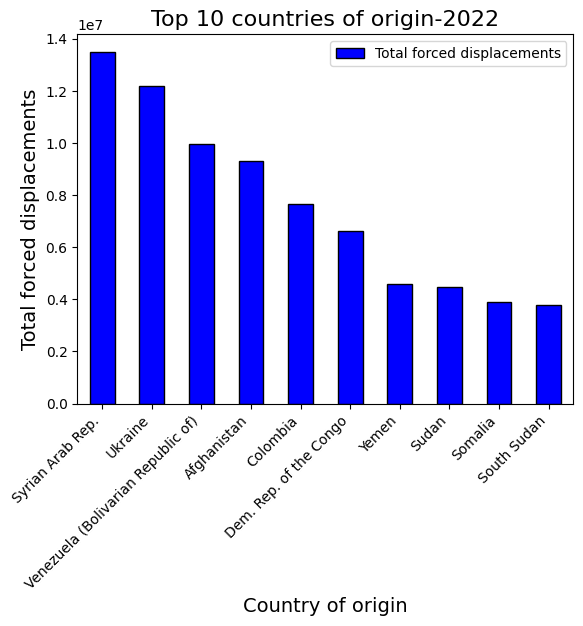

In [19]:
country = population[population['Year']==2022].groupby('Country of origin')['Total forced displacements'].sum().reset_index().sort_values('Total forced displacements', ascending=False).head(10)
country.plot(kind='bar', x='Country of origin', y='Total forced displacements', color='blue', edgecolor='black')
plt.ylabel('Total forced displacements', fontsize=14)
plt.xlabel('Country of origin', fontsize=14)
plt.title('Top 10 countries of origin-2022', fontsize=16)
plt.xticks(rotation=45, ha = 'right')
plt.show()



In [60]:
#Creamos una tabla con los 10 paises que mas refugiados reciben de ucrania, en el año 2022: 

def top_10(country, year):
    df = population[(population['Country of origin'] == country) & (population['Year'] == year)]
    df = df.groupby(['Country of origin','Country of asylum', 'Asylum_latitude', 'Asylum_longitude', 'Origin_latitude', 'Origin_longitude'])['Total forced displacements'].sum().reset_index()
    df.sort_values('Total forced displacements', ascending=False, inplace=True)
    df = df.head(10)
    return df
ukr = top_10('Ukraine', 2022)
syr = top_10('Syrian Arab Rep.', 2022)
afg = top_10('Afghanistan', 2022)
ven = top_10('Venezuela (Bolivarian Republic of)', 2022)

#creamos un df que combine los 4 paises 
combined_data = pd.concat([ukr, syr, afg, ven])
combined_data['Total forced displacements'] = combined_data['Total forced displacements']/1000000

# Create a new figure
fig = go.Figure()

#creamos una lista con las latitudes y longitudes de origen y destino, el total de desplazados y el pais de asilo y origen
source_to_dest = zip(combined_data["Origin_latitude"], combined_data["Asylum_latitude"],
                     combined_data["Origin_longitude"], combined_data["Asylum_longitude"],
                     combined_data["Total forced displacements"], combined_data["Country of asylum"], combined_data["Country of origin"])

#bucle for para cada elemento de la lista, en el orden en el que aparecen en la lista

for idx, (olat, alat, olon, alon, displacements, country_asylum, country_origin) in enumerate(source_to_dest):
    # Características de la línea entre origen y destino
    fig.add_trace(go.Scattergeo(
        lat=[olat, alat],
        lon=[olon, alon],
        mode='lines',
        line=dict(width=displacements, color= 'red')
    ))
    # Caracteristicas del país de origen
    fig.add_trace(go.Scattergeo(
        lat=[olat],
        lon=[olon],
        mode='markers',
        marker=dict(size=5, color="lightblue", symbol="circle"),
        #text=f'Origin: {ukr["Country of origin (ISO)"].unique()}',
        showlegend=False
    ))
    # Label for the destination country
    fig.add_trace(go.Scattergeo(
        lat=[alat],
        lon=[alon+idx*0.01],
        mode='markers',
        marker=dict(size=8, color="blue", symbol="circle"),
        text=f'Origin: {country_origin}<br>Destination: {country_asylum}<br>Displacements: {displacements}',
        showlegend=False
    ))
 
fig.update_layout(
    title_text=f'{combined_data["Country of origin"].unique()[0]} to {combined_data["Country of asylum"].unique()[0]}',
    height=700,
    width=900,
    margin={"t": 0, "b": 0, "l": 0, "r": 0, "pad": 0},
    showlegend=False,
        geo=dict(
        landcolor='white',
        lakecolor='white',
        bgcolor='lightblue',
        projection_type='natural earth'
        )
)

fig.show()